In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

To try:

 - Periodic * RQ
 - 



In [63]:
## Locally Periodic Kernel ##
#period_constraint_short = gpytorch.constraints.Interval(0.02, 0.08) ## short term
period_constraint_short = gpytorch.constraints.Interval(0.05, 0.13) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

#period_local_lengthscale = gpytorch.constraints.Interval(0.1, 0.5)
seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #lengthscale_constraint=period_local_lengthscale
    )
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.17, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

period_local_lengthscale = gpytorch.constraints.Interval(0.01, 0.03)
seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #lengthscale_constraint=period_local_lengthscale
    )
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.25)
local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha
local_variation.lengthscale = local_variation_lengthscale

local_variation_lengthscale_2 = gpytorch.constraints.Interval(0.01, 0.03)

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #engthscale_constraint=local_variation_lengthscale_2
    )
)


covar_module = locally_short_periodic + locally_long_periodic + local_variation + local_variation_2

In [64]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    'xl106_druckmaschine_30T', 30, True)

Iter 1 , Loss = 1.0610746858766533 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0306817081431292 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9997812036260204 , Noise = 0.5982192754745483
Iter 4 , Loss = 0.9711341994578602 , Noise = 0.5544047951698303
Iter 5 , Loss = 0.943373288792747 , Noise = 0.5130366683006287
Iter 6 , Loss = 0.9166142906371778 , Noise = 0.47407734394073486
Iter 7 , Loss = 0.8918903065075362 , Noise = 0.43748101592063904
Iter 8 , Loss = 0.8688103046066363 , Noise = 0.4032086133956909
Iter 9 , Loss = 0.8458822568154121 , Noise = 0.3712262213230133
Iter 10 , Loss = 0.8237291577170961 , Noise = 0.34149250388145447
Iter 11 , Loss = 0.8032853770753513 , Noise = 0.3139585852622986
Iter 12 , Loss = 0.7839267172325578 , Noise = 0.2885710299015045
Iter 13 , Loss = 0.7657513151283485 , Noise = 0.2652622163295746
Iter 14 , Loss = 0.7496536451938857 , Noise = 0.24395205080509186
Iter 15 , Loss = 0.7350940402440106 , Noise = 0.224559023976326
Iter 16 , Loss = 0.7218696840699

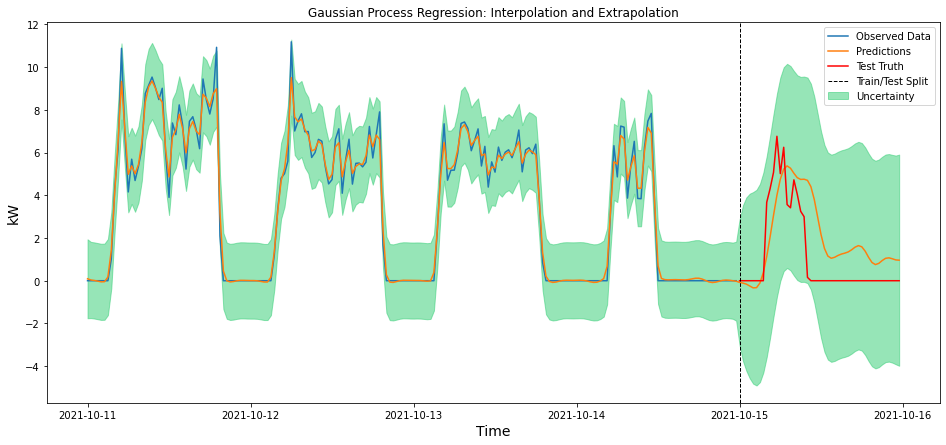

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  tensor(47.1488, dtype=torch.float64) kWh
Upper bound next day energy consumption =  tensor(160.3649, dtype=torch.float64) kWh
Lower bound next day energy consumption =  tensor(-66.0672, dtype=torch.float64) kWh


In [65]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    training_iter=100,
    machine='xl106_druckmaschine_30T',
    update_score=False
)   

In [66]:
mse, mape

(2.8912603928806444, 196045.9709270117)

### 10T

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [10]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1167325933146015 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0860422000868042 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0578813669127018 , Noise = 0.5982540845870972
Iter 4 , Loss = 1.034519570589345 , Noise = 0.5545238852500916
Iter 5 , Loss = 1.016989282242349 , Noise = 0.5133202075958252
Iter 6 , Loss = 1.0029779132467664 , Noise = 0.4746778905391693
Iter 7 , Loss = 0.9891673703587464 , Noise = 0.4386254549026489
Iter 8 , Loss = 0.974480447016517 , Noise = 0.4051511883735657
Iter 9 , Loss = 0.9593008503451905 , Noise = 0.37420448660850525
Iter 10 , Loss = 0.9444954295627985 , Noise = 0.3457084596157074
Iter 11 , Loss = 0.9311038585661806 , Noise = 0.3195689618587494
Iter 12 , Loss = 0.9202051139326329 , Noise = 0.29568687081336975
Iter 13 , Loss = 0.9120358580878859 , Noise = 0.27397993206977844
Iter 14 , Loss = 0.9053210593234681 , Noise = 0.25439631938934326
Iter 15 , Loss = 0.8990413582122293 , Noise = 0.2368994802236557
Iter 16 , Loss = 0.89371013735091

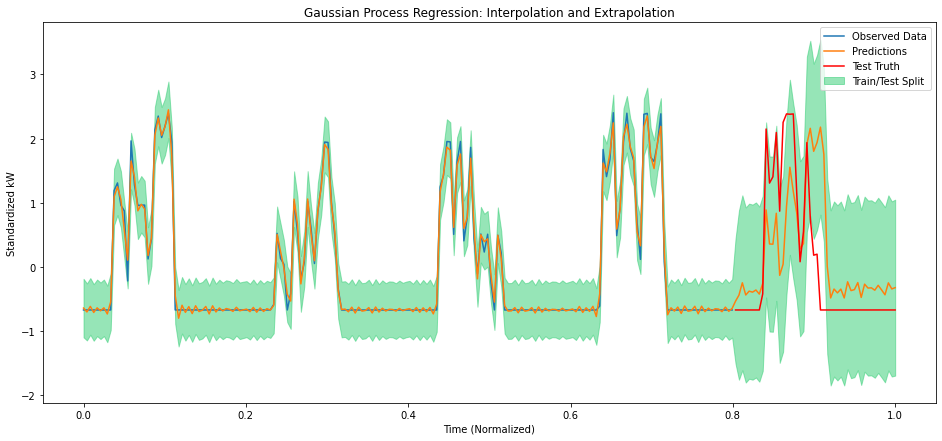

Points outside of confidence region: [2.25321257 2.38491068]


In [11]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [12]:
mse, mape

(0.8419735761654904, 1.0628913651431569)